<a href="https://colab.research.google.com/github/udip-shrestha/udip_s/blob/main/Image_Recognition_System_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Data preprocessing

# Training image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Images/Images',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 8515 files belonging to 126 classes.


#Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Images/Images',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8515 files belonging to 126 classes.


#Model Building

In [ ]:
cnn = tf.keras.models.Sequential()


#Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
# cnn.add(tf.keras.layers.Dropout(0.5)) # To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5)) # Dropping some neuron to avoid overfitting

In [ ]:
# Output Layer
cnn.add(tf.keras.layers.Dense(units=126, activation='softmax'))

# Compiling and Training Phase

In [ ]:
cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Use from_logits=False since we're using softmax activation
    metrics=['accuracy']
)

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 27, 27, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)       

In [ ]:
# Train the model
training_history = cnn.fit(
    training_set,
    validation_data=validation_set,
    epochs=32
)


Epoch 1/32
267/267 [==============================] - 2370s 9s/step - loss: 4.8345 - accuracy: 0.0087 - val_loss: 4.8292 - val_accuracy: 0.0115
Epoch 2/32
267/267 [==============================] - 628s 2s/step - loss: 4.8287 - accuracy: 0.0092 - val_loss: 4.8251 - val_accuracy: 0.0117
Epoch 3/32
267/267 [==============================] - 626s 2s/step - loss: 4.8255 - accuracy: 0.0094 - val_loss: 4.8226 - val_accuracy: 0.0115
Epoch 4/32
267/267 [==============================] - 630s 2s/step - loss: 4.8236 - accuracy: 0.0101 - val_loss: 4.8211 - val_accuracy: 0.0117
Epoch 5/32
267/267 [==============================] - 627s 2s/step - loss: 4.8225 - accuracy: 0.0099 - val_loss: 4.8203 - val_accuracy: 0.0117
Epoch 6/32
267/267 [==============================] - 631s 2s/step - loss: 4.8219 - accuracy: 0.0101 - val_loss: 4.8199 - val_accuracy: 0.0117
Epoch 7/32
267/267 [==============================] - 630s 2s/step - loss: 4.8215 - accuracy: 0.0108 - val_loss: 4.8196 - val_accuracy: 0.011

# Saving Model

In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history  # Return Dictionary of History

{'loss': [4.834507942199707,
  4.828731536865234,
  4.825463771820068,
  4.823564052581787,
  4.822476387023926,
  4.821875095367432,
  4.821530342102051,
  4.821298599243164,
  4.821271896362305,
  4.821177005767822,
  4.821114540100098,
  4.821113109588623,
  4.8211188316345215,
  4.821125507354736,
  4.8211236000061035,
  4.821078300476074,
  4.8210906982421875,
  4.821103096008301,
  4.821083068847656,
  4.8211493492126465,
  4.821062088012695,
  4.82107400894165,
  4.821104526519775,
  4.821117401123047,
  4.821093559265137,
  4.821073055267334,
  4.821040630340576,
  4.821061611175537,
  4.821080207824707,
  4.821076393127441,
  4.8210930824279785,
  4.821135997772217],
 'accuracy': [0.0086905462667346,
  0.009160305373370647,
  0.009395184926688671,
  0.010099823586642742,
  0.009864944033324718,
  0.010099823586642742,
  0.010804463177919388,
  0.010217263363301754,
  0.009160305373370647,
  0.010099823586642742,
  0.00927774515002966,
  0.010334703139960766,
  0.01080446317791

In [ ]:
# Recording History in Json file
import json
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Calculating Accuracy of Model Achieved on Validation Set

In [ ]:
training_history.history['val_accuracy']

[0.011509101837873459,
 0.011743981391191483,
 0.011509101837873459,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483,
 0.011743981391191483]

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-2] * 100))

Validation set Accuracy: 1.1743981391191483 %


# Accuracy Visualization

# Training Visualization

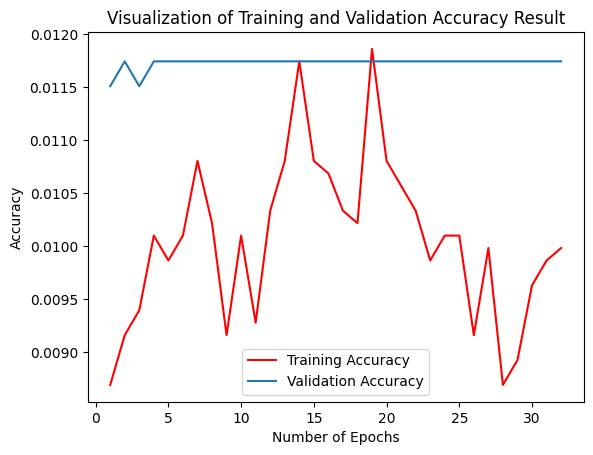

In [ ]:
epochs = [i for i in range(1, 33)]
plt.plot(epochs, training_history.history['accuracy'], color = 'red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Visualization of Training and Validation Accuracy Result')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

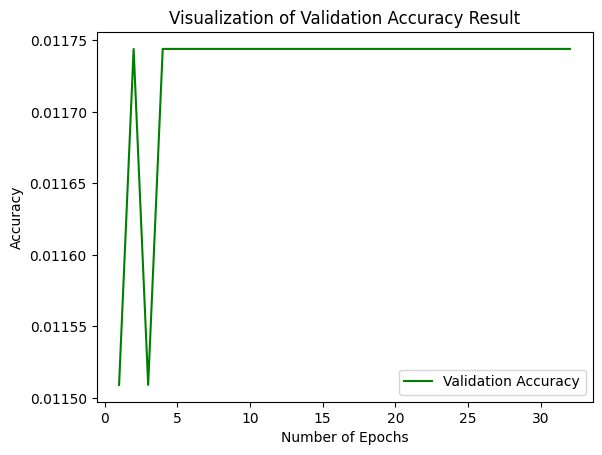

In [ ]:
plt.plot(epochs, training_history.history['val_accuracy'], color = 'green', label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Visualization of Validation Accuracy Result')
plt.show

# Evaluating CNN Model

In [ ]:
training_loss, training_accuracy = cnn.evaluate(training_set)

267/267 [==============================] - 216s 795ms/step - loss: 4.8193 - accuracy: 0.0117


In [ ]:
val_loss, val_accuracy = cnn.evaluate(validation_set)

267/267 [==============================] - 205s 756ms/step - loss: 4.8193 - accuracy: 0.0117


# Test Set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Images/Images',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 8515 files belonging to 126 classes.


In [ ]:
test_loss, test_accuracy = cnn.evaluate(test_set)

267/267 [==============================] - 205s 753ms/step - loss: 4.8193 - accuracy: 0.0117


In [ ]:
test_accuracy

0.011743981391191483